In [1]:
## Example exercise with the wine dataset from sklearn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [2]:
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target
# data['target_names'] = 
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
data.columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od_of_diluted_wines', 'proline', 'target']

In [5]:
data.shape

(178, 14)

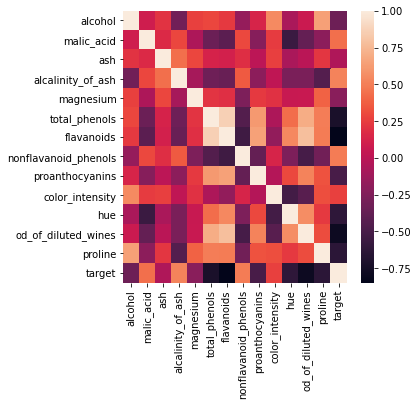

In [6]:
#evaluate features for correlations
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())
plt.show()

In [7]:
#choose features from heat plot
features = ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline', 'od_of_diluted_wines']

In [36]:
#set X to features
X = data[features]
Y = data['target']

In [38]:
#normalize fetures
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
#split train and test data with 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 99)

In [40]:
#classify with random forest regressor
rfc = RandomForestClassifier(random_state=99)
rfc.fit(X_train, Y_train)

/Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [42]:
print('Training Score: {}'.format(rfc.score(X_train, Y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, Y_test)))

Training Score: 0.9929577464788732
Testing Score: 0.9444444444444444


In [54]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [55]:
print('Training Score: {}'.format(knn.score(X_train, Y_train)))
print('Testing Score: {}'.format(knn.score(X_test, Y_test)))

Training Score: 0.9647887323943662
Testing Score: 0.9444444444444444


In [61]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=99)
svc.fit(X_train, Y_train)

/Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=99,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
print('Training Score: {}'.format(svc.score(X_train, Y_train)))
print('Testing Score: {}'.format(svc.score(X_test, Y_test)))

Training Score: 0.9647887323943662
Testing Score: 0.9722222222222222


In [65]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
print('Training Score: {}'.format(gnb.score(X_train, Y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, Y_test)))

Training Score: 0.9577464788732394
Testing Score: 0.9444444444444444
